# Business Understanding
In order to compare apples to apples, the most useful data would come from sources that most resemble the conditions relevant to Microsoft's business scenario. That means data about 2022 movies, valued in 2022 dollars, released as Microsoft plans to release them, and according to Microsoft's business goals.

Of course, more data should only help. Records from earlier years will be of value, but somewhat less so, because the environments earlier movies existed in were different. For example, when there was less competition, movies could run in theaters for months before snowballing in popularity, which simply does not occur today. In recent decades, cable airings and VHS/DVD purchase and rental factored in substantially enough that some "cult" movies made a disproportionate amount of their money that way, which is also largely no longer the case. Another difference is that on streaming platforms today, movies must compete not only with movies but with traditional television programs that run side by side on all of the same platforms. And the longer ago a movie made its money, the more difficult it is to adjust those values for inflation.

Our data should also more specifically reflect Microsoft's distribution plans and business goals. Will Microsoft release movies to a streaming platform, in theaters, or a hybrid? Is the goal simply to make the most money per dollar invested? Should the goal instead be to attract the greatest share of viewers, in order to build loyalty to Microsoft's movie brand, or perhaps gain subscribers to a streaming platform? Should Microsoft seek to produce many reliably profitable movies, or should they take big risks and hope to land a monster hit that announces their presence in the industry?

We can provide a variety of analyses that will hopefully provide helpful additional perspectives without contradicting each other so much as to be self-defeating. We should use budget information to look at return on investment, but we should also include a metric that ignores profitability and focuses instead on the share of viewers a movie achieves relative to its competition at a given time.

In addition to the aspects mentioned, one attribute to study could be Star Power. We can define this attribute through a formula that considers how popular the people who appear in the advertising for a movie (usually the director and one or more actors) are at the time of its release. Is it better to have one major star, or a power couple, or an ensemble? Is the director as important as the lead actor?

We might also investigate the other side of that coin and look at the involvement of other movie personnel that most viewers don't recognize, such as cinematographers and composers. If such a person has a history of working in successful movies, how well does that predict future success?

As we look at the effects of a movie's running time, we could consider whether there is an ideal running time for a certain genre.

We can look deeper at genre and consider what genres have been more popular at different times, and how long that preference typically lasts, whether it's seasonal, generational, cyclic, etc. Most importantly we can attempt to pinpoint what those preferences are now (or what they'll be when Microsoft's movies are soon released).

We can look at how much a movie's budget affects its eventual gross, and whether low or high investments tend to return greater profits, as a percentage.

Lastly, we could investigate factors external to movie content. Do periods of economic boom or bust affect movie preferences? Does war, or the party or popularity of the current US president matter?

In [1]:
# This cell will set Boolean values in order to determine whether certain dataframes are processed in this notebook.

bom = False
tmdb = False
tn = False
rtm = False
rtr = False
movie_basics = False
directors = False
known_for = False
movie_akas = False
movie_ratings = False
persons = False
principals = False
writers = False

# In order to run the relevant cells of this notebook, only tn, movie_basics, directors, and persons need to be
# turned "on". The rest can be commented out in order to speed up the notebook's processes.

bom = True
tmdb = True
tn = True
rtm = True
rtr = True
movie_basics = True
directors = True
known_for = True
movie_akas = True
movie_ratings = True
persons = True
principals = True
writers = True

# Data Understanding

## Importing the Data
3 of the files are in csv format. 2 are in tsv format. 1 is in db format and is comprised of 8 tables. We'll begin working with all datafiles, which will require converting the 8 tables currently in SQL format.

In [2]:
import numpy as np
import pandas as pd

# import csv files as dataframes
if bom:
    bom_df = pd.read_csv('data/bom.movie_gross.csv')
if tmdb:
    tmdb_df = pd.read_csv('data/tmdb.movies.csv')
if tn:
    tn_df = pd.read_csv('data/tn.movie_budgets.csv')

# import tsv files as dataframes
if rtm:
    rtm_df = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t')
if rtr:
    rtr_df = pd.read_csv('data/rt.reviews.tsv', delimiter='\t', encoding= 'unicode_escape')

In [3]:
import sqlite3

# connect to sqlite, import all tables from SQL database, convert to dataframes
conn = sqlite3.connect("data/im.db")

if movie_basics:
    movie_basics_df = pd.read_sql("""
    SELECT *
    FROM movie_basics
    ;""", conn)

if directors:
    directors_df = pd.read_sql("""
    SELECT *
    FROM directors
    ;""", conn)

if known_for:
    known_for_df = pd.read_sql("""
    SELECT *
    FROM known_for
    ;""", conn)

if movie_akas:
    movie_akas_df = pd.read_sql("""
    SELECT *
    FROM movie_akas
    ;""", conn)

if movie_ratings:
    movie_ratings_df = pd.read_sql("""
    SELECT *
    FROM movie_ratings
    ;""", conn)

if persons:
    persons_df = pd.read_sql("""
    SELECT *
    FROM persons
    ;""", conn)

if principals:
    principals_df = pd.read_sql("""
    SELECT *
    FROM principals
    ;""", conn)

if writers:
    writers_df = pd.read_sql("""
    SELECT *
    FROM writers
    ;""", conn)

In [4]:
# This function will show the number of records, number of duplicate records,
# column names, and number of missing items from each column,
def assess(df):
    print(str(len(df)) + ' records.')
    print()
    if len(df) == len(df.drop_duplicates()):
        print('This dataframe contains no duplicates.')
    else:
        num = len(df) - len(df.drop_duplicates())
        print('This dataframe contains ' + str(num) + ' duplicates.')
    print()
    print('Columns, and their missing data:')
    print(df.isna().sum())
    print('Data types:')
    print(df.dtypes)

### Box Office Mojo (bom_df)
3,387 records ... title | studio | domest_gross | foreign_gross | year

Data issues: There are no duplicates. Data is missing for foreign grosses for 40% of the records. A deeper look reveals that many of these titles *were* released internationally and that the foreign grosses data is indeed missing.

Data strengths: Info on grosses

Data limitations: The information provided by the TN table may render this table irrelevant, since TN has more records and its records for grosses are complete.
### The Movie Database (tmdb_df)
26,517 records ... genre | language | title | popularity | release date | vote average

Data issues: It lacked a year column, but one can be created from the release date field.

Data strengths: details on popularity

Data limitations: vast majority of records are from 2010-2018
### TN (tn_df)
5,782 records ... release date | title | production buget | domestic gross | worldwide gross

Data issues: It lacked a year column, but one can be created from the release date field.

Data strengths: details on budget, as well as grosses

Data limitations: more heavilty weighted toward recent years, but does include at least a few dozen movies per year going back to 1980
### Rotten Tomatoes Movies (rtm_df)
1,560 records ... rating | genre | director | writer | theater date | dvd date | box office | runtime | studio

Data issues: There are no titles at all. It might be possible to assign titles by matching records from other databases using director / writer / year / runtime / studio fields, but that would be of questionable value given that there are only 1,560 records. In converting this file to a SQL table, it was necessary to preserve the original, non-consecutive indexing so that the records match their counterparts in Rotten Tomatoes Reviews.

Data strengths:

Data limitations:
### Rotten Tomatoes Reviews (rtr_df)
54,423 records ... reviews of 1,135 movies ... rating | date

Data issues: There were 9 duplicate records. There are no titles — same problem with the counterpart Rotten Tomatoes Movies file.

Data strengths:

Data limitations:
### IMDb Movie Basics
146,144 records ... title | year | runtime | genres

Data issues: The original title is missing for 21 records whereas primary_title is present for all. When the two title fields differ, the primary_title field appears to be the English translation of the title. It should be no problem to ignore the original_title field and work just with primary_title field. There are plenty of duplicate titles, but it appears that these are *not* duplicated records. Runtimes are missing for about 20% of the records. Genres are missing for about 4%. There are entries for years later than 2020, which will be of no value to us.

Data strengths:

Data limitations:
### IMDb Persons
606,647 records ... name | birth year | death year | primary job

Data issues: No real issues. We don't plan to work with any of the missing fields.

Data strengths:

Data limitations: 
### IMDb Directors
291,174 records ... associates 140,417 movies with 109,253 directors

Data issues: Nearly half the records are duplicates.
### IMDb Writers
255,873 records ... associates 110,261 movies with 122,576 writers

Data issues: About a third of the records are duplicates.
### IMDb Principals
1,028,186 records ... associates 143,454 movies with various movie personnel and ranks their importance on a given film

Data issues: The missing values won't affect our work.
### IMDb Known For
1,638,260 records ... associates 576,444 persons with 514,781 movies

Data issues: None
### IMDb Movie AKAs
331,703 records ... associates 122,302 movies with alternate titles

Data issues: There are many missing values, but none of them should affect our work.

Data strengths: This may assist in matching records from other tables. It may not be necessary to use this table at all, however.
### IMDb Movie Ratings
73,856 records ... movie_id | average rating | number of votes

Data issues: None

Data strengths: This provides ratings for a massive amount of movies that are indexed in the IMDb family of tables.

Data limitations: It only provides ratings for about half of IMDb's movies. Also not clear how these ratings relate to profitability. Who is rating them? Do they spend money?
## A preliminary comparison of records
This chart shows how many movies each of the 5 sources has records for

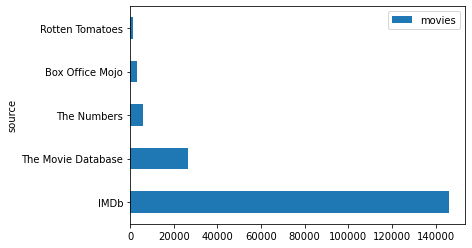

In [5]:
if movie_basics and tmdb and tn and bom and rtm:
    records_df = pd.DataFrame(
        {'source': ['IMDb', 'The Movie Database', 'The Numbers', 'Box Office Mojo', 'Rotten Tomatoes'],
         'movies':[len(movie_basics_df), len(tmdb_df), len(tn_df), len(bom_df), len(rtm_df)] })
    ax = records_df.plot.barh(x='source', y='movies', rot=0)

# Data Cleaning
## Removing Duplicates
3 of the tables had duplicates that can be dealt with quite easily.

In [6]:
# First we'll drop the duplicates in place from the dataframes that have duplicates.
# Then we'll reset the index and finally delete the new column that was created.

if rtr:
    rtr_df.drop_duplicates(inplace=True)
    rtr_df.reset_index(inplace=True)
    rtr_df.drop('index', axis=1, inplace=True)
if directors:
    directors_df.drop_duplicates(inplace=True)
    directors_df.reset_index(inplace=True)
    directors_df.drop('index', axis=1, inplace=True)
if writers:
    writers_df.drop_duplicates(inplace=True)
    writers_df.reset_index(inplace=True)
    writers_df.drop('index', axis=1, inplace=True)

## Dealing with Missing and Extraneous Values
We will work WITHOUT the following:
- movie_basics with missing runtime
- movie_basics with missing year
- movie_basics with missing genre
- movie_basics with years later than 2020
- rtm with missing years

In [7]:
if movie_basics:
    movie_basics_df.dropna(subset = ['runtime_minutes', 'start_year', 'genres'], inplace = True)
    movie_basics_df = movie_basics_df.loc[movie_basics_df['start_year'] <= 2020]
    movie_basics_df.reset_index(inplace=True)
    movie_basics_df.drop('index', axis=1, inplace=True)

In [8]:
if rtm:
    rtm_df.dropna(subset = ['theater_date'], inplace = True)

## Editing Values
### Issues with dollars
The tn table has what should be numerical values stored as strings that contain dollar signs and commas. Here we'll convert those to integers.

In [9]:
# First we'll make a function that converts these strings

def dol_to_int(dol):
    result_1 = dol.replace(",", "")
    result_2 = result_1.replace("$", "")
    result_3 = int(result_2)
    return result_3

# Here we'll add two columns that show the information we want

if tn:
    tn_df['budget'] = tn_df.production_budget.map(lambda x: dol_to_int(x))
    tn_df['gross'] = tn_df.worldwide_gross.map(lambda x: dol_to_int(x))

While we're working on the tn table, it will be useful to make an ROI column in the only table with budget data

In [10]:
if tn:
    tn_df['roi'] = tn_df['gross'] / tn_df['budget']

### Rotten Tomatoes issues
Both of the Rotten Tomatoes tables were missing title fields. If those tables added value to our work, it might be worth the effort of "triangulating" those titles by cross-referencing other details with known titles from other tables. But the TN table has 3 times as many box office records overall and 10 times as many (2,214 vs. 204) over the period of 2010-2018. The movie_basics table is missing many of its runtime data, but over the period of 2010-2018 it has 109,815 records with runtime data intact, nearly 100 times as many records as the Rotten Tomatoes table.
### Box Office Mojo issues
The bom table is missing records for foreign grosses from roughly 40% of its records. This is likely the only value that this table would have offered to the project. We cannot use these records in comparisons for total gross, because the conclusions would be flawed. One solution would be to compare only domestic grosses. This would still produce flawed conclusions, because Microsoft presumably cares about its total gross and not just domestic gross. Another solution would be to limit our comparisons to just those movies for which we have all gross values from the bom table. This amounts to 2,009 movies. But the tn table — whose worldwide gross records are completely intact — has 2,124 records, also from the period of 2010-2018.

At this point we conclude that it is unnecessary to include the Box Office Mojo data or data from either of the Rotten Tomatoes tables.

### Title issues
Some of the titles do not match across tables. For example, the 2017 film is called "Star Wars: The Last Jedi" by tmdb and imdb, whereas tn calls it "Star Wars Ep. VIII: The Last Jedi" (which almost but does not exactly match imdb's original_title field "Star Wars: Episode VIII - The Last Jedi"). It is not clear at all how such issues will be resolved.

### Issues with years
We'll add a year column for the relevant tables that lack one.

In [11]:
# Here we'll add year columns to the tables that lack them (and for which a year would be relevant).

if tmdb:
    tmdb_df['year'] = tmdb_df.release_date.map(lambda x: x[:4])
if tn:
    tn_df['year'] = tn_df.release_date.map(lambda x: x[-4:])
if rtm:
    rtm_df['year'] = rtm_df['theater_date'].apply(lambda x: str(x)[-4:])

# Then we'll recast those columns as integers

if tmdb:
    tmdb_df = tmdb_df.astype({'year': 'int64'})
if tn:
    tn_df = tn_df.astype({'year': 'int64'})
if rtm:
    rtm_df = rtm_df.astype({'year': 'int64'})

# This won't work for rtm unless we first get rid of the missing year values

Next we'll observe the frequency distribution by year to determine what comparable data we can work with.

In [12]:
# This will create data series of how many movie records each source has in a given year

if movie_basics and tmdb and tn and bom and rtm:

    yrs_bom_df = bom_df.groupby(['year']).count()['title']
    # 2010-2018
    yrs_tmdb_df = tmdb_df.groupby(['year']).count()['id']
    # 1930-2020
    yrs_tn_df = tn_df.groupby(['year']).count()['id']
    # 1915-2020
    yrs_rtm_df = rtm_df.groupby(['year']).count()['id']
    # 1921-2018
    yrs_imdb_df = movie_basics_df.groupby(['start_year']).count()['movie_id']
    # 2010-2020

    # Here we will add 0 entries to years without any movie records

    for yr in range(1915,2021):
        if yr not in yrs_bom_df.index:
            yrs_bom_df[yr] = 0
        if yr not in yrs_tmdb_df.index:
            yrs_tmdb_df[yr] = 0
        if yr not in yrs_tn_df.index:
            yrs_tn_df[yr] = 0
        if yr not in yrs_rtm_df.index:
            yrs_rtm_df[yr] = 0
        if yr not in yrs_imdb_df.index:
            yrs_imdb_df[yr] = 0

    # We'll re-sort the records

    yrs_bom_df.sort_index(inplace=True)
    yrs_tmdb_df.sort_index(inplace=True)
    yrs_tn_df.sort_index(inplace=True)
    yrs_rtm_df.sort_index(inplace=True)
    yrs_imdb_df.sort_index(inplace=True)

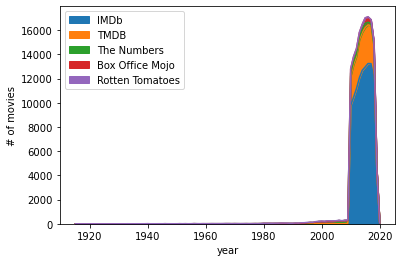

In [13]:
if movie_basics and tmdb and tn and bom and rtm:

    yrs_data = []
    index = []
    for yr in range(1915,2021):
        yrs_data.append((yrs_imdb_df[yr],yrs_tmdb_df[yr],yrs_tn_df[yr],yrs_bom_df[yr],yrs_rtm_df[yr]))
        index.append(yr)
    columns = ['IMDb', 'TMDB', 'The Numbers', 'Box Office Mojo', 'Rotten Tomatoes']
    df = pd.DataFrame(data = yrs_data, index = index, columns = columns)
    ax = df.plot.area(stacked=True)
    ax.set_xlabel('year')
    ax.set_ylabel('# of movies');

The above stacked chart shows that IMDb and to a lesser extend TMDB dominate the usable data between the years of 2010 and 2020.

Given other issues, we will likely ignore everything except the data from IMDb and The Numbers. Here is a relevant slice of what records The Numbers offers:

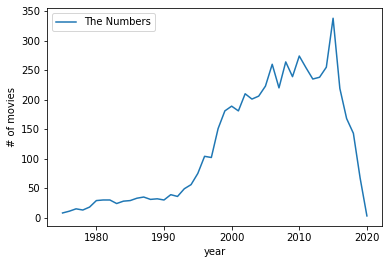

In [14]:
if movie_basics and tmdb and tn and bom and rtm:

    yrs_data = []
    index = []
    for yr in range(1975,2021):
        yrs_data.append((yrs_tn_df[yr]))
        index.append(yr)
    columns = ['The Numbers']
    df = pd.DataFrame(data = yrs_data, index = index, columns = columns)
    ax = df.plot.line()
    ax.set_xlabel('year')
    ax.set_ylabel('# of movies');

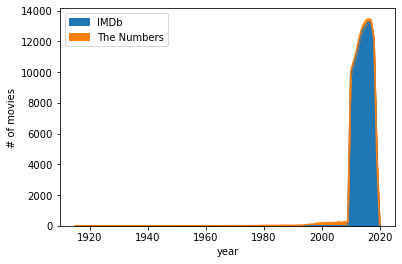

In [15]:
if movie_basics and tmdb and tn and bom and rtm:

    yrs_data = []
    index = []
    for yr in range(1915,2021):
        yrs_data.append((yrs_imdb_df[yr],yrs_tn_df[yr]))
        index.append(yr)
    columns = ['IMDb', 'The Numbers']
    df = pd.DataFrame(data = yrs_data, index = index, columns = columns)
    ax = df.plot.area(stacked=True)
    ax.set_xlabel('year')
    ax.set_ylabel('# of movies');

In [16]:
# This will limit all relevant dataframes to an inclusive year interval
# And we have to reset the index and delete the new column that was created

start = 2010
end = 2018

if tmdb:
    tmdb_df = tmdb_df.loc[tmdb_df['year'] >= start]
    tmdb_df = tmdb_df.loc[tmdb_df['year'] <= end]
    tmdb_df.reset_index(inplace=True)
    tmdb_df.drop('index', axis=1, inplace=True)
if bom:
    bom_df = bom_df.loc[bom_df['year'] >= start]
    bom_df = bom_df.loc[bom_df['year'] <= end]
    bom_df.reset_index(inplace=True)
    bom_df.drop('index', axis=1, inplace=True)
if tn:
    tn_df = tn_df.loc[tn_df['year'] >= start]
    tn_df = tn_df.loc[tn_df['year'] <= end]
    tn_df.reset_index(inplace=True)
    tn_df.drop('index', axis=1, inplace=True)
if rtm:
    rtm_df = rtm_df.loc[rtm_df['year'] >= start]
    rtm_df = rtm_df.loc[rtm_df['year'] <= end]
    rtm_df.reset_index(inplace=True)
    rtm_df.drop('index', axis=1, inplace=True)
if movie_basics:
    movie_basics_df = movie_basics_df.loc[movie_basics_df['start_year'] >= start]
    movie_basics_df = movie_basics_df.loc[movie_basics_df['start_year'] <= end]
    movie_basics_df.reset_index(inplace=True)
    movie_basics_df.drop('index', axis=1, inplace=True)

## Converting all to SQL
Now we'll convert all the dataframes to SQL tables and begin learning more via queries.

In [17]:
cur = conn.cursor()

In [18]:
if tmdb:
    cur.execute("""CREATE TABLE tmdb (
                                    id INTEGER PRIMARY KEY,
                                    genre_ids TEXT,
                                    id_ INTEGER,
                                    original_language TEXT,
                                    original_title TEXT,
                                    popularity FLOAT,
                                    release_date TEXT,
                                    title TEXT,
                                    vote_average FLOAT,
                                    vote_count INTEGER,
                                    year INTEGER
                                    )          
                """)

In [19]:
if tmdb:
    for i in range(len(tmdb_df)):
        cur.execute('''INSERT INTO tmdb
                  VALUES (NULL, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            ''', (
            tmdb_df.loc[i,:].values.tolist()[1],
            int(tmdb_df.loc[i,:].values.tolist()[2]),
            tmdb_df.loc[i,:].values.tolist()[3],
            tmdb_df.loc[i,:].values.tolist()[4],
            tmdb_df.loc[i,:].values.tolist()[5],
            tmdb_df.loc[i,:].values.tolist()[6],
            tmdb_df.loc[i,:].values.tolist()[7],
            tmdb_df.loc[i,:].values.tolist()[8],
            int(tmdb_df.loc[i,:].values.tolist()[9]),
            tmdb_df.loc[i,:].values.tolist()[10]))

In [20]:
# cur.execute('''DROP TABLE tn;''')
if tn:
    cur.execute("""CREATE TABLE tn (
                                    id INTEGER PRIMARY KEY,
                                    release_date TEXT,
                                    movie TEXT,
                                    production_budget INTEGER,
                                    domestic_gross INTEGER,
                                    worldwide_gross INTEGER,
                                    budget INTEGER,
                                    gross INTEGER,
                                    roi FLOAT,
                                    year INTEGER
                                    )          
                """)

In [21]:
if tn:
    for i in range(len(tn_df)):
        cur.execute('''INSERT INTO tn
                  VALUES (NULL, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            ''', (
            tn_df.loc[i,:].values.tolist()[1],
            tn_df.loc[i,:].values.tolist()[2],
            tn_df.loc[i,:].values.tolist()[3],
            tn_df.loc[i,:].values.tolist()[4],
            tn_df.loc[i,:].values.tolist()[5],
            int(tn_df.loc[i,:].values.tolist()[6]),
            int(tn_df.loc[i,:].values.tolist()[7]),
            tn_df.loc[i,:].values.tolist()[8],
            int(tn_df.loc[i,:].values.tolist()[9])))

In [22]:
if rtm:
    cur.execute("""CREATE TABLE rtm (
                                    id INTEGER PRIMARY KEY,
                                    synopsis TEXT,
                                    rating TEXT,
                                    genre TEXT,
                                    director TEXT,
                                    writer TEXT,
                                    theater_date TEXT,
                                    dvd_date TEXT,
                                    currency TEXT,
                                    box_office TEXT,
                                    runtime TEXT,
                                    studio TEXT,
                                    year INTEGER
                                    )          
                """)

In [23]:
if rtm:
    for i in range(len(rtm_df)):
        cur.execute('''INSERT INTO rtm
                  VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
            ''', (
            int(rtm_df.loc[i,:].values.tolist()[0]),
            rtm_df.loc[i,:].values.tolist()[1],
            rtm_df.loc[i,:].values.tolist()[2],
            rtm_df.loc[i,:].values.tolist()[3],
            rtm_df.loc[i,:].values.tolist()[4],
            rtm_df.loc[i,:].values.tolist()[5],
            rtm_df.loc[i,:].values.tolist()[6],
            rtm_df.loc[i,:].values.tolist()[7],
            rtm_df.loc[i,:].values.tolist()[8],
            rtm_df.loc[i,:].values.tolist()[9],
            rtm_df.loc[i,:].values.tolist()[10],
            rtm_df.loc[i,:].values.tolist()[11],
            rtm_df.loc[i,:].values.tolist()[12]))

In [24]:
if rtr:
    cur.execute("""CREATE TABLE rtr (
                                    id INTEGER,
                                    review TEXT,
                                    rating TEXT,
                                    fresh TEXT,
                                    critic TEXT,
                                    top_critic TEXT,
                                    publisher TEXT,
                                    date TEXT
                                    )          
                """)

In [25]:
if rtr:
    for i in range(len(rtr_df)):
        cur.execute('''INSERT INTO rtr
                  VALUES (?, ?, ?, ?, ?, ?, ?, ?)
            ''', (
            int(rtr_df.loc[i,:].values.tolist()[0]),
            rtr_df.loc[i,:].values.tolist()[1],
            rtr_df.loc[i,:].values.tolist()[2],
            rtr_df.loc[i,:].values.tolist()[3],
            rtr_df.loc[i,:].values.tolist()[4],
            int(rtr_df.loc[i,:].values.tolist()[5]),
            rtr_df.loc[i,:].values.tolist()[6],
            rtr_df.loc[i,:].values.tolist()[7]))

In [26]:
if directors:
    cur.execute('''DROP TABLE directors;''')
    cur.execute("""CREATE TABLE directors (
                                    movie_id TEXT,
                                    person_id TEXT
                                    )          
                """)

In [27]:
if directors:
    for i in range(len(directors_df)):
        cur.execute('''INSERT INTO directors
                  VALUES (?, ?)
            ''', (
            directors_df.loc[i,:].values.tolist()[0],
            directors_df.loc[i,:].values.tolist()[1]))

In [28]:
if writers:
    cur.execute('''DROP TABLE writers;''')
    cur.execute("""CREATE TABLE writers (
                                    movie_id TEXT,
                                    person_id TEXT
                                    )          
                """)

In [29]:
if writers:
    for i in range(len(writers_df)):
        cur.execute('''INSERT INTO writers
                  VALUES (?, ?)
            ''', (
            writers_df.loc[i,:].values.tolist()[0],
            writers_df.loc[i,:].values.tolist()[1]))

# Recommendations
## Recommendation #1: Runtime
We can make a special dataframe to group together relevant data to analyze the effect of runtime.

In [30]:
runtime_df = pd.read_sql("""
SELECT year, movie, runtime_minutes, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
;""", conn)

runtime_df.drop_duplicates(inplace=True)
runtime_df.reset_index(inplace=True)
runtime_df.drop('index', axis=1, inplace=True)

runtime_df.dropna(subset = ['runtime_minutes'], inplace = True)

bins = []
for i in range(57):
    bins.append(i*5)

runtime_df['runtime_bins'] = pd.cut(runtime_df['runtime_minutes'], bins)
runtime_df.rename(columns={'runtime_minutes': 'running time (minutes)', 'budget': 'budget (x $10m)'}, inplace=True)

In [31]:
# here we'll drop one outlier (of 280 minutes) to make the plots look better

tobedropped = runtime_df[runtime_df['running time (minutes)'] >= 280].index
runtime_df.drop(tobedropped, inplace=True)

Here we'll plot ROI against runtime (grouped together into intervals/bins of 5 minutes):

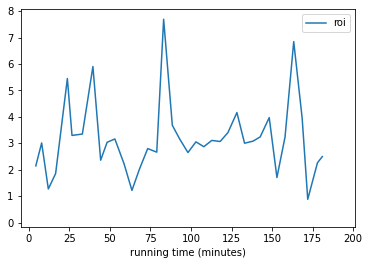

In [32]:
runtime_df.groupby('runtime_bins').mean().plot('running time (minutes)', 'roi', kind='line');

We notice a few significant spikes. The highest is around 80-85 minutes. Others are near 25, 40, and 165 minutes.

To better understand this, we can make a histogram of runtimes (with similar bins). This will only show the number of movies, ignoring ROI.

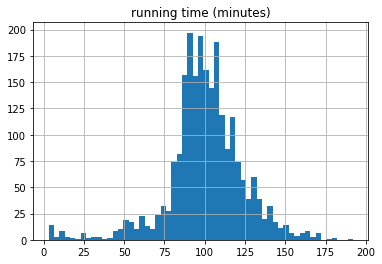

In [33]:
ax.set_xlabel('minutes')
ax.set_ylabel('# of movies')
runtime_df.hist(column='running time (minutes)', bins=57);

This histogram demonstrates that movies approximately 25, 40, or 165 minutes long are far less commonly produced than movies between 75 and 120 minutes long. This suggests that the spikes we saw in the ROI plot corresponding to 25, 40, and 165 minutes may just be anomalous and difficult to replicate. But because there is far more data around movies of moderate length, the spike in the 80-85 minutes bin is much more informative.

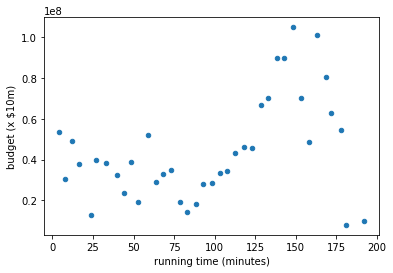

In [34]:
runtime_df.groupby('runtime_bins').mean().plot('running time (minutes)', 'budget (x $10m)', kind='scatter');

Again, we know that less data is available for "very long" movies (longer than about 120 minutes). But from the data we have, it seems (unsurprisingly) that budgets get very big for movies runnning longer than 120 minutes. This suggests that producing a movie around 165 minutes long is likely very risky.
## Conclusion #1: Produce a movie about 80-85 minutes long

## Recommendation #2: Genre
The movie_basics table lists many combinations of genres for most films, which does not lend itself to much insight, because there are so few of each combination. We can extract a list of the single genres.

In [35]:
set_of_genres = set()
for genres in movie_basics_df['genres']:
    x = genres.split(',')
    for genre in x:
        set_of_genres.add(genre)

In [36]:
set_of_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

There are 27 distinct genres. We can select movies of each genre and pull data on how many movies of each genre and what the average ROI for those movies is.

In [37]:
genre_summary = {}

In [38]:
# Get details on each genre
# Action

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Action%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Action'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Adult

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Adult%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Adult'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Adventure

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Adventure%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Adventure'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Animation

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Animation%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Animation'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Biography

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Biography%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Biography'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Comedy

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Comedy%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Comedy'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Crime

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Crime%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Crime'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Documentary

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Documentary%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Documentary'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Drama

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Drama%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Drama'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Family

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Family%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Family'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Fantasy

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Fantasy%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Fantasy'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Game-Show

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Game-Show%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Game-Show'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# History

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%History%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['History'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Horror

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Horror%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Horror'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Music

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Music%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Music'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Musical

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Musical%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Musical'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Mystery

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Mystery%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Mystery'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# News

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%News%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['News'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Reality-TV

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Reality-TV%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Reality-TV'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Romance

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Romance%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Romance'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Sci-Fi

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Sci-Fi%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Sci-Fi'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Short

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Short%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Short'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Sport

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Sport%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Sport'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Talk-Show

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Talk-Show%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Talk-Show'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Thriller

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Thriller%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Thriller'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# War

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%War%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['War'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

# Western

genre_df = pd.read_sql("""
SELECT year, movie, genres, budget, gross, roi
FROM movie_basics
JOIN tn
ON movie = primary_title
WHERE genres LIKE '%Western%'
;""", conn)

genre_df.drop_duplicates(inplace=True)
genre_df.reset_index(inplace=True)
genre_df.drop('index', axis=1, inplace=True)

genre_summary['Western'] = [genre_df['movie'].count(), genre_df['roi'].mean()]

The following will display, for each genre, #1 how many records we have of it, and #2 the average ROI for that genre.

In [39]:
genre_summary

{'Action': [549, 2.5930055955449953],
 'Adult': [0, nan],
 'Adventure': [399, 2.851820072261232],
 'Animation': [115, 3.661954333620671],
 'Biography': [184, 2.9762736943641577],
 'Comedy': [667, 3.0514122319320984],
 'Crime': [312, 2.0036260810668782],
 'Documentary': [217, 2.5853891043907296],
 'Drama': [1150, 2.9554865741043583],
 'Family': [124, 2.3109635251208296],
 'Fantasy': [153, 3.2747155983059684],
 'Game-Show': [0, nan],
 'History': [72, 2.2435985326494103],
 'Horror': [294, 7.125860689181473],
 'Music': [82, 3.156295867671179],
 'Musical': [15, 2.9103339434180544],
 'Mystery': [173, 8.358653048812748],
 'News': [4, 1.3445369826678766],
 'Reality-TV': [1, 0.0],
 'Romance': [276, 3.7027240803878922],
 'Sci-Fi': [171, 3.101319408279128],
 'Short': [0, nan],
 'Sport': [52, 4.103281450576782],
 'Talk-Show': [0, nan],
 'Thriller': [404, 5.059355377755819],
 'War': [32, 1.171601070408395],
 'Western': [18, 1.0280651244468755]}

In [40]:
# Clear out the genres that are represented by too few movies

genre_summary_temp = {}

for genre in genre_summary:
    if genre_summary[genre][0] > 5:
        genre_summary_temp[genre] = genre_summary[genre]

genre_summary = genre_summary_temp

genre_summary

{'Action': [549, 2.5930055955449953],
 'Adventure': [399, 2.851820072261232],
 'Animation': [115, 3.661954333620671],
 'Biography': [184, 2.9762736943641577],
 'Comedy': [667, 3.0514122319320984],
 'Crime': [312, 2.0036260810668782],
 'Documentary': [217, 2.5853891043907296],
 'Drama': [1150, 2.9554865741043583],
 'Family': [124, 2.3109635251208296],
 'Fantasy': [153, 3.2747155983059684],
 'History': [72, 2.2435985326494103],
 'Horror': [294, 7.125860689181473],
 'Music': [82, 3.156295867671179],
 'Musical': [15, 2.9103339434180544],
 'Mystery': [173, 8.358653048812748],
 'Romance': [276, 3.7027240803878922],
 'Sci-Fi': [171, 3.101319408279128],
 'Sport': [52, 4.103281450576782],
 'Thriller': [404, 5.059355377755819],
 'War': [32, 1.171601070408395],
 'Western': [18, 1.0280651244468755]}

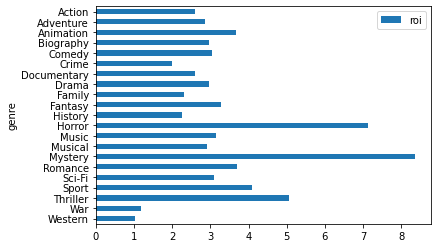

In [41]:
graph_x = []
graph_y = []
for genre in genre_summary.keys():
    graph_x.append(genre)
    graph_y.append(genre_summary[genre][1])

records_df = pd.DataFrame(
    {'genre': graph_x,
     'roi': graph_y })[::-1]

ax = records_df.plot.barh(x='genre', y='roi', rot=0)

The horror and mystery genres stand out from the rest, and there are enough movies of each genre that we can dismiss the chance that these figures are anomalous due to a small sample size.
## Conclusion #2: Produce a movie in the Horror and/or Mystery genre
## Recommendation #3: Director Experience
We will find two values to associate with the director of a movie:
1. Budget Experience
2. Past Profitability

_Budget Experience_ will measure the sum of the budgets of all the movies this director has directed in the previous 5 years.

_Past Profitability_ will measure the average ROI of the same collection of movies (from the previous 5 years).

In [42]:
# create a function to help summarize data for directors and movies

def director_assess(df):

# drop duplicates

    df.drop_duplicates(inplace=True)
    df.reset_index(inplace=True)
    df.drop('index', axis=1, inplace=True)

# create separate dataframes for directors WITH and WITHOUT any directing credits in previous 5 yrs
    
    prior_df = df.dropna(subset = ['avg of recent roi'])
    no_prior_df = df[df['avg of recent roi'].isna()]

# deliver results    

    print('Directors WITHOUT experience (in the previous 5 years) yield an average ROI of '
          + str(no_prior_df['roi'].mean()))
    print('Directors WITH experience yield an average ROI of '
          + str(prior_df['roi'].mean()))
    print('')
    print('Among directors WITH recent experience ...')
    print('The correlation between budget experience and ROI is '
          + str(df['sum of recent budgets (x $100m)'].corr(df['roi'])))
    print('The correlation between past and current ROI is '
          + str(df['avg of recent roi'].corr(df['roi'])))
    print('')
    print('Here are the relevant scatterplots:')
    df.plot('sum of recent budgets (x $100m)', 'roi', kind='scatter')

# drop one outlier that messes up the graph

    tobedropped = df[df['avg of recent roi'] > 100].index
    df.drop(tobedropped).plot('avg of recent roi', 'roi', kind='scatter');

In [43]:
# create dataframe of director past profitability and budget experience for directors in 2018

director_2018_df = pd.read_sql("""
SELECT primary_name AS director, AVG(roi) AS past_profitability, SUM(budget) AS budget_experience
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year >= 2013 AND year <= 2017
GROUP BY primary_name

;""", conn)

# create dataframe of movie ROI in 2018

movie_2018_df = pd.read_sql("""
SELECT primary_name AS director, movie, roi
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year == 2018

;""", conn)

In [44]:
# create dataframe of director past profitability and budget experience for directors in 2017

director_2017_df = pd.read_sql("""
SELECT primary_name AS director, AVG(roi) AS past_profitability, SUM(budget) AS budget_experience
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year >= 2012 AND year <= 2016
GROUP BY primary_name

;""", conn)

# create dataframe of movie ROI in 2017

movie_2017_df = pd.read_sql("""
SELECT primary_name AS director, movie, roi
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year == 2017

;""", conn)

In [45]:
# create dataframe of director past profitability and budget experience for directors in 2016

director_2016_df = pd.read_sql("""
SELECT primary_name AS director, AVG(roi) AS past_profitability, SUM(budget) AS budget_experience
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year >= 2011 AND year <= 2015
GROUP BY primary_name

;""", conn)

# create dataframe of movie ROI in 2016

movie_2016_df = pd.read_sql("""
SELECT primary_name AS director, movie, roi
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year == 2016

;""", conn)

In [ ]:
# create dataframe of director past profitability and budget experience for directors in 2015

director_2015_df = pd.read_sql("""
SELECT primary_name AS director, AVG(roi) AS past_profitability, SUM(budget) AS budget_experience
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year >= 2010 AND year <= 2014
GROUP BY primary_name

;""", conn)

# create dataframe of movie ROI in 2015

movie_2015_df = pd.read_sql("""
SELECT primary_name AS director, movie, roi
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year == 2015

;""", conn)

In [ ]:
dir_profit_2018_df = movie_2018_df.join(director_2018_df.set_index('director'), on='director', how = 'left')
dir_profit_2017_df = movie_2017_df.join(director_2017_df.set_index('director'), on='director', how = 'left')
dir_profit_2016_df = movie_2016_df.join(director_2016_df.set_index('director'), on='director', how = 'left')
dir_profit_2015_df = movie_2015_df.join(director_2015_df.set_index('director'), on='director', how = 'left')
dir_profit_df = pd.concat([dir_profit_2018_df, dir_profit_2017_df, dir_profit_2016_df, dir_profit_2015_df])

dir_profit_df.rename(columns={'budget_experience': 'sum of recent budgets (x $100m)',
                              'past_profitability': 'avg of recent roi'}, inplace=True)

In [ ]:
print('The following data is for ALL movies and ALL directors')
print()
director_assess(dir_profit_df)

To allow for the possibility that there are small budget movies that are skewing the data in any direction, the following will _only_ look at movies with a budget over $1 million, but consider all director records

In [ ]:
# create dataframe of director past profitability and budget experience for directors in 2018

director_2018_df = pd.read_sql("""
SELECT primary_name AS director, AVG(roi) AS past_profitability, SUM(budget) AS budget_experience
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year >= 2013 AND year <= 2017
GROUP BY primary_name

;""", conn)

# create dataframe of movie ROI in 2018

movie_2018_df = pd.read_sql("""
SELECT primary_name AS director, movie, roi
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year == 2018
AND budget >= 1000000

;""", conn)

In [ ]:
# create dataframe of director past profitability and budget experience for directors in 2017

director_2017_df = pd.read_sql("""
SELECT primary_name AS director, AVG(roi) AS past_profitability, SUM(budget) AS budget_experience
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year >= 2012 AND year <= 2016
GROUP BY primary_name

;""", conn)

# create dataframe of movie ROI in 2017

movie_2017_df = pd.read_sql("""
SELECT primary_name AS director, movie, roi
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year == 2017
AND budget >= 1000000

;""", conn)

In [ ]:
# create dataframe of director past profitability and budget experience for directors in 2016

director_2016_df = pd.read_sql("""
SELECT primary_name AS director, AVG(roi) AS past_profitability, SUM(budget) AS budget_experience
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year >= 2011 AND year <= 2015
GROUP BY primary_name

;""", conn)

# create dataframe of movie ROI in 2016

movie_2016_df = pd.read_sql("""
SELECT primary_name AS director, movie, roi
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year == 2016
AND budget >= 1000000

;""", conn)

In [ ]:
# create dataframe of director past profitability and budget experience for directors in 2015

director_2015_df = pd.read_sql("""
SELECT primary_name AS director, AVG(roi) AS past_profitability, SUM(budget) AS budget_experience
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year >= 2010 AND year <= 2014
GROUP BY primary_name

;""", conn)

# create dataframe of movie ROI in 2015

movie_2015_df = pd.read_sql("""
SELECT primary_name AS director, movie, roi
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year == 2015
AND budget >= 1000000

;""", conn)

In [ ]:
dir_profit_2018_df = movie_2018_df.join(director_2018_df.set_index('director'), on='director', how = 'left')
dir_profit_2017_df = movie_2017_df.join(director_2017_df.set_index('director'), on='director', how = 'left')
dir_profit_2016_df = movie_2016_df.join(director_2016_df.set_index('director'), on='director', how = 'left')
dir_profit_2015_df = movie_2015_df.join(director_2015_df.set_index('director'), on='director', how = 'left')
dir_profit_df = pd.concat([dir_profit_2018_df, dir_profit_2017_df, dir_profit_2016_df, dir_profit_2015_df])

dir_profit_df.rename(columns={'budget_experience': 'sum of recent budgets (x $100m)',
                              'past_profitability': 'avg of recent roi'}, inplace=True)

In [ ]:
print('The following data is for movies with a budget over $1m and ALL directors')
print('')
director_assess(dir_profit_df)

Again, to allow for the possibility that small-budget movies are skewing our data in any direction, the following will only consider movies and directors of movies with budgets over $1 million

In [ ]:
# create dataframe of director past profitability and budget experience for directors in 2018

director_2018_df = pd.read_sql("""
SELECT primary_name AS director, AVG(roi) AS past_profitability, SUM(budget) AS budget_experience
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year >= 2013 AND year <= 2017
AND budget >= 1000000
GROUP BY primary_name

;""", conn)

# create dataframe of movie ROI in 2018

movie_2018_df = pd.read_sql("""
SELECT primary_name AS director, movie, roi
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year == 2018
AND budget >= 1000000

;""", conn)

In [ ]:
# create dataframe of director past profitability and budget experience for directors in 2017

director_2017_df = pd.read_sql("""
SELECT primary_name AS director, AVG(roi) AS past_profitability, SUM(budget) AS budget_experience
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year >= 2012 AND year <= 2016
AND budget >= 1000000
GROUP BY primary_name

;""", conn)

# create dataframe of movie ROI in 2017

movie_2017_df = pd.read_sql("""
SELECT primary_name AS director, movie, roi
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year == 2017
AND budget >= 1000000

;""", conn)

In [ ]:
# create dataframe of director past profitability and budget experience for directors in 2016

director_2016_df = pd.read_sql("""
SELECT primary_name AS director, AVG(roi) AS past_profitability, SUM(budget) AS budget_experience
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year >= 2011 AND year <= 2015
AND budget >= 1000000
GROUP BY primary_name

;""", conn)

# create dataframe of movie ROI in 2016

movie_2016_df = pd.read_sql("""
SELECT primary_name AS director, movie, roi
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year == 2016
AND budget >= 1000000

;""", conn)

In [ ]:
# create dataframe of director past profitability and budget experience for directors in 2015

director_2015_df = pd.read_sql("""
SELECT primary_name AS director, AVG(roi) AS past_profitability, SUM(budget) AS budget_experience
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year >= 2010 AND year <= 2014
AND budget >= 1000000
GROUP BY primary_name

;""", conn)

# create dataframe of movie ROI in 2015

movie_2015_df = pd.read_sql("""
SELECT primary_name AS director, movie, roi
FROM movie_basics
JOIN directors
ON movie_basics.movie_id = directors.movie_id
JOIN tn
ON movie = primary_title
JOIN persons
ON directors.person_id = persons.person_id
WHERE year == 2015
AND budget >= 1000000

;""", conn)

In [ ]:
dir_profit_2018_df = movie_2018_df.join(director_2018_df.set_index('director'), on='director', how = 'left')
dir_profit_2017_df = movie_2017_df.join(director_2017_df.set_index('director'), on='director', how = 'left')
dir_profit_2016_df = movie_2016_df.join(director_2016_df.set_index('director'), on='director', how = 'left')
dir_profit_2015_df = movie_2015_df.join(director_2015_df.set_index('director'), on='director', how = 'left')
dir_profit_df = pd.concat([dir_profit_2018_df, dir_profit_2017_df, dir_profit_2016_df, dir_profit_2015_df])

dir_profit_df.rename(columns={'budget_experience': 'sum of recent budgets (x $100m)',
                              'past_profitability': 'avg of recent roi'}, inplace=True)

In [ ]:
print('The following data is for movies and directors of movies with a budget over $1m')
print('')
director_assess(dir_profit_df)

None of these views support there being any substantial advantage to hiring a director with extensive experience.
## Conclusion #3: Director experience matters very little, if at all

conn.close()